In [1]:
import nibabel as nib
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from skimage.transform import rotate
from skimage.util import montage
import os
import numpy as np
import tarfile
import pandas as pd
from skimage.transform import resize
from scipy.ndimage import gaussian_filter

In [2]:
path_to_tar_file = "/kaggle/input/brats-2021-task1/BraTS2021_Training_Data.tar"
output_directory = "brats21-dataset-training-validation"

# Open the tar file in read mode
with tarfile.open(path_to_tar_file, "r") as tar_ref:
    # Extract all contents to the specified directory
    tar_ref.extractall(output_directory)

print(f"Extraction completed. Files are saved to {output_directory}")

Extraction completed. Files are saved to brats21-dataset-training-validation


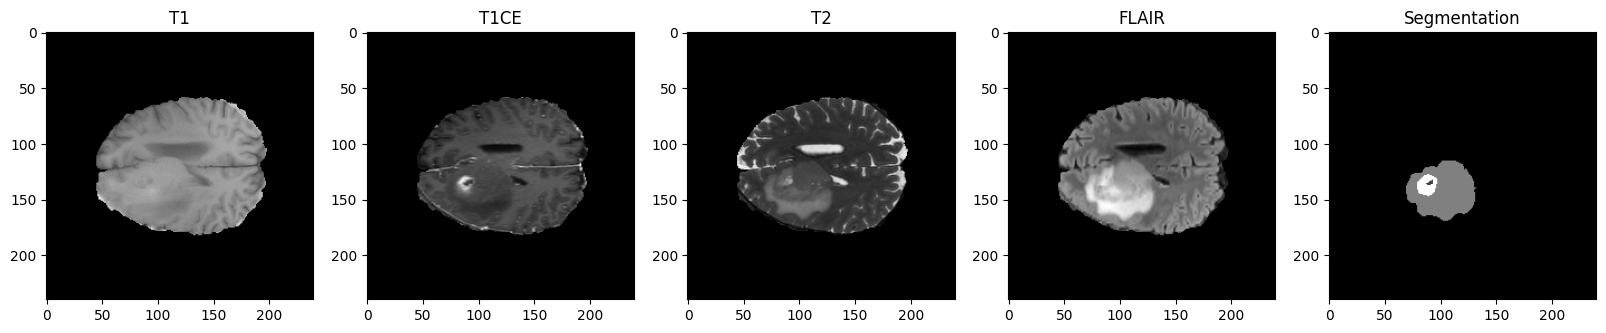

In [4]:
sample_path = '/kaggle/working/brats21-dataset-training-validation/BraTS2021_00002/BraTS2021_00002_'

# Load the 4 MRI modalities and the segmentation located in the patient's path using the nibabel library
t1_img=nib.load(sample_path + 't1.nii.gz')
t1ce_img=nib.load(sample_path + 't1ce.nii.gz')
t2_img=nib.load(sample_path + 't2.nii.gz')
flair_img=nib.load(sample_path + 'flair.nii.gz')
seg_img=nib.load(sample_path + 'seg.nii.gz')

# Get the image data
t1_data = t1_img.get_fdata()
t1ce_data = t1ce_img.get_fdata()
t2_data = t2_img.get_fdata()
flair_data = flair_img.get_fdata()
seg_data = seg_img.get_fdata()

# Plot the 100th slice of the 4 RMI modalities and the segmentation
slice_nb = 100

fig, axs = plt.subplots(1, 5, figsize=(20,20))
axs[0].imshow(t1_data[:,:,slice_nb], cmap="gray")
axs[0].set_title('T1')
axs[1].imshow(t1ce_data[:,:,slice_nb], cmap="gray")
axs[1].set_title('T1CE')
axs[2].imshow(t2_data[:,:,slice_nb], cmap="gray")
axs[2].set_title('T2')
axs[3].imshow(flair_data[:,:,slice_nb], cmap="gray")
axs[3].set_title('FLAIR')
axs[4].imshow(seg_data[:,:,slice_nb], cmap="gray")
axs[4].set_title('Segmentation')
plt.show()

In [5]:
print(t1_data.shape)

print(seg_data.shape)

(240, 240, 155)
(240, 240, 155)


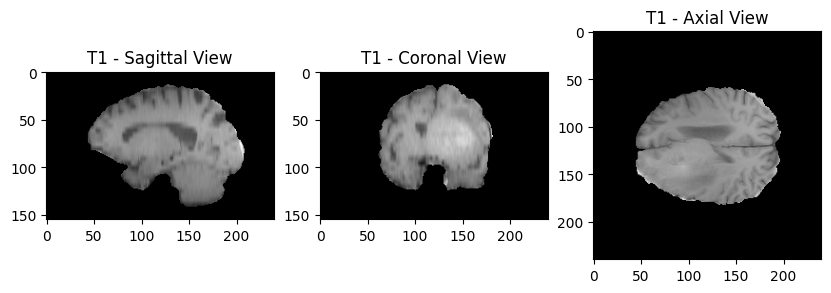

In [6]:
slice_nb = 100

fig, axs2 = plt.subplots(1, 3, figsize=(10,10))

axs2[0].imshow(rotate(t1_data[slice_nb,:,:], 90, resize=True), cmap="gray")
axs2[0].set_title('T1 - Sagittal View')

axs2[1].imshow(rotate(t1_data[:,slice_nb,:], 90, resize=True), cmap="gray")
axs2[1].set_title('T1 - Coronal View')

axs2[2].imshow(t1_data[:,:,slice_nb], cmap="gray")
axs2[2].set_title('T1 - Axial View')

plt.show()

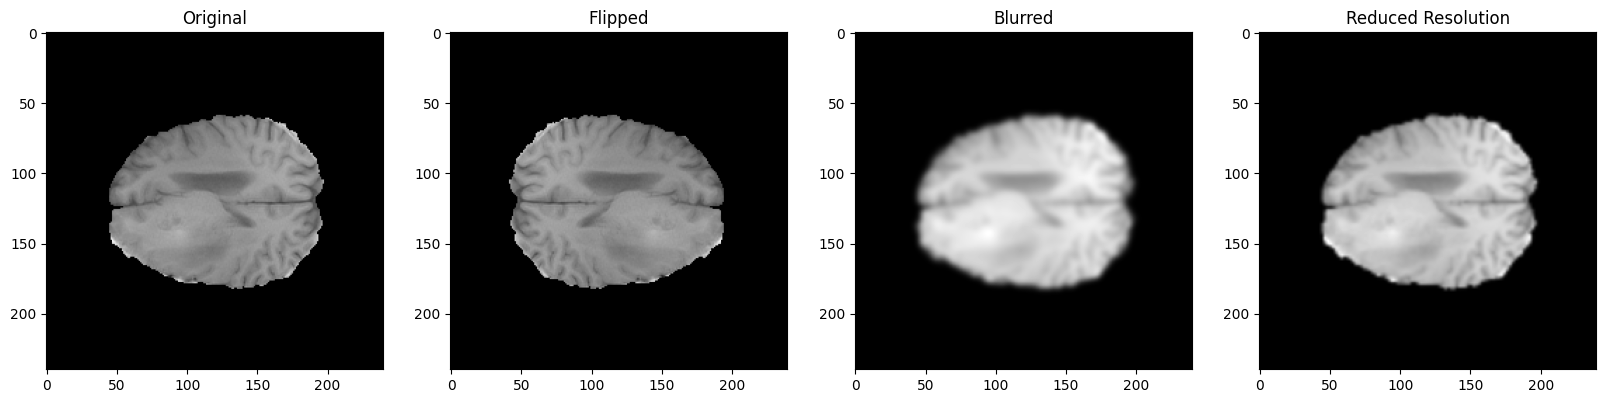

In [7]:
flipped_horizontally = np.flip(t1_data, axis=1)

flipped_vertically = np.flip(t1_data, axis=0)

blurred = gaussian_filter(t1_data, sigma=2)

downsampled = resize(t1_data, 
                            (t1_data.shape[0] // 2, t1_data.shape[1] // 2, t1_data.shape[2]),
                            anti_aliasing=True)

reduced_resolution = resize(downsampled, (240, 240, 155), anti_aliasing=True) # Upsample to the original shape of the data

fig, axs = plt.subplots(1, 4, figsize=(20, 20))

axs[0].imshow(t1_data[:, :, slice_nb], cmap="gray")
axs[0].set_title('Original')

axs[1].imshow(flipped_horizontally[:, :, slice_nb], cmap="gray")
axs[1].set_title('Flipped')

axs[2].imshow(blurred[:, :, slice_nb], cmap="gray")
axs[2].set_title('Blurred')

axs[3].imshow(reduced_resolution[:, :, slice_nb], cmap="gray")
axs[3].set_title('Reduced Resolution')

plt.show()

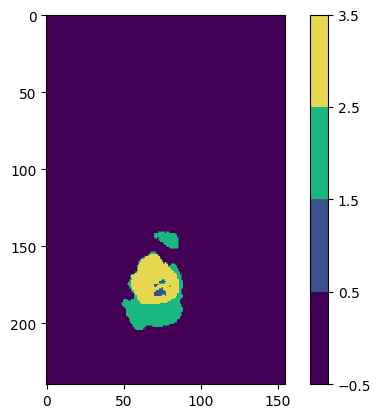

In [8]:
# Plot a segmantation
some_seg_img = nib.load("/kaggle/working/brats21-dataset-training-validation/BraTS2021_00020/BraTS2021_00020_seg.nii.gz").get_fdata()

cmap = mpl.colors.ListedColormap(['#440054', '#3b528b', '#18b880', '#e6d74f'])
norm = mpl.colors.BoundaryNorm([-0.5, 0.5, 1.5, 2.5, 3.5], cmap.N)

plt.imshow(some_seg_img[100,:,:], cmap=cmap, norm=norm)
plt.colorbar()

ALTTAKİ BÖLÜMÜ ÇALIŞTIRMAYIN, BİR KERE SONUÇ VERMESİ YETERLİ, ÇALIŞMASI ÇOK UZUN SÜRÜYOR VE İPTAL DE EDİLMİYOR

In [9]:
data_path = "/kaggle/working/brats21-dataset-training-validation/"
seg_samples = [os.path.join(data_path, sample, f"{sample}_seg.nii.gz") for sample in os.listdir(data_path) if not sample.endswith('.csv')]

saved_values = []
max_nb_values = 0
for sample in seg_samples:
    try:
        seg_img = nib.load(sample).get_fdata()
        unique_values = np.unique(seg_img)
        nb_unique_values = len(np.unique(seg_img))
    
        if nb_unique_values > max_nb_values:
            max_nb_values = nb_unique_values
            saved_values = unique_values
    except: continue
print(f"Maximum number of values in all segmentation images: {max_nb_values}")
print(f"Values: {saved_values}")
values, counts = np.unique(some_seg_img, return_counts=True)
print(counts)

Maximum number of values in all segmentation images: 4
Values: [0. 1. 2. 4.]
[8868079   11639   27873   20409]


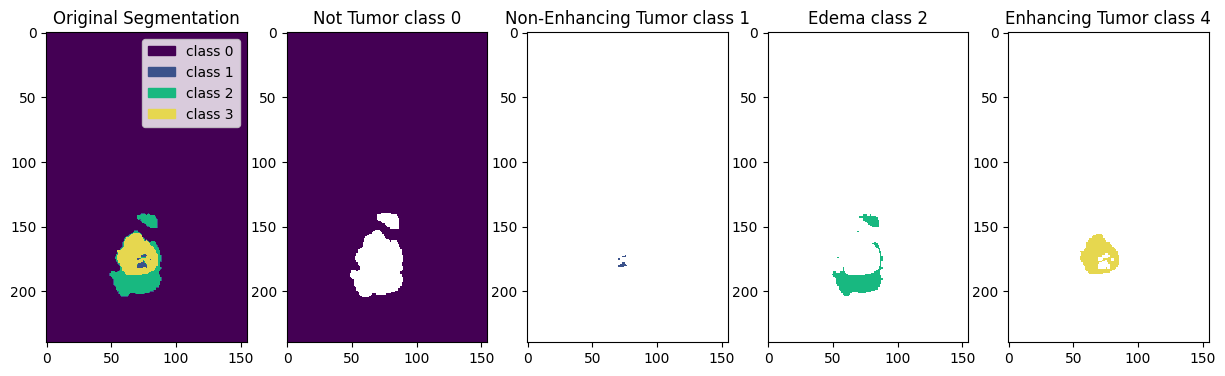

In [10]:
# Deletion of class 0
seg_0 = some_seg_img.copy()
seg_0[seg_0 != 0] = np.nan

# Isolation of class 1
seg_1 = some_seg_img.copy()
seg_1[seg_1 != 1] = np.nan

# Isolation of class 2
seg_2 = some_seg_img.copy()
seg_2[seg_2 != 2] = np.nan

# Isolation of class 4
seg_3 = some_seg_img.copy()
seg_3[seg_3 != 4] = np.nan

class_names = ['class 0', 'class 1', 'class 2', 'class 3']
legend = [plt.Rectangle((0, 0), 1, 1, color=cmap(i), label=class_names[i]) for i in range(len(class_names))]

fig, axs3 = plt.subplots(1, 5, figsize=(15, 15))

axs3[0].imshow(some_seg_img[100,:,:], cmap=cmap, norm=norm)
axs3[0].set_title('Original Segmentation')
axs3[0].legend(handles=legend, loc='upper right')

axs3[1].imshow(seg_0[100,:,:], cmap=cmap, norm=norm)
axs3[1].set_title('Not Tumor class 0')

axs3[2].imshow(seg_1[100,:,:], cmap=cmap, norm=norm)
axs3[2].set_title('Non-Enhancing Tumor class 1')

axs3[3].imshow(seg_2[100,:,:], cmap=cmap, norm=norm)
axs3[3].set_title('Edema class 2')

axs3[4].imshow(seg_3[100,:,:], cmap=cmap, norm=norm)
axs3[4].set_title('Enhancing Tumor class 4')

plt.show()